Импортируем необходимые модули и библиотеки:

In [1]:

import tensorflow as tf
import tensorflow.keras
 
# библиотека для вывода изображений
import matplotlib.pyplot as plt
%matplotlib inline
 
# -- Импорт для построения модели: --
# импорт слоев
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
# импорт модели
from tensorflow.keras.models import Sequential
# импорт оптимайзера
from tensorflow.keras.optimizers import Adam

 импортируем данные MNIST из базы Keras

In [2]:

# Импортируем набор данных MNIST 
from tensorflow.keras.datasets import mnist

In [3]:
	
# загружаем тренировочные и тестовые данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Узнаем длины массивов с данными

In [4]:
print(len(X_train), len(y_train), len(X_test), len(y_train))

60000 60000 10000 60000


In [5]:
	
# Проверка типа и размера данных
print(X_train[0].shape,X_train[0].dtype)

(28, 28) uint8


In [6]:

# Выведем первый элемент массива на экран
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print(y_train[0])

5


(-0.5, 27.5, 27.5, -0.5)

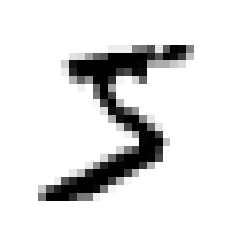

In [8]:
# Выведем на экран хранящееся в X_train[0] изображение
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

In [9]:
# Преобразование данных в матрицах изображений
# X_train.max() возвращает значение 255
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [10]:
# Преобразуем целевые значения методом «one-hot encoding»
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [11]:
# Создаем модель
model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train[0].shape)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
]) 
# Выведем полученную модель на экран
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 64)            2112      
                                                                 
 dense_2 (Dense)             (None, 28, 128)           8320      
                                                                 
 dense_3 (Dense)             (None, 28, 256)           33024     
                                                                 
 dense_4 (Dense)             (None, 28, 512)           131584    
                                                                 
 flatten (Flatten)           (None, 14336)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [12]:
#Компиляция модели
model.compile(loss='binary_crossentropy',
            optimizer = Adam(lr=0.00024),
             metrics = ['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:

# Функция ранней остановки
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=6)

In [16]:
# Запускаем обучение модели
history = model.fit(X_train, y_train, batch_size=500, verbose=1, 
                    epochs= 50, validation_split = 0.2, callbacks=[stop])

Epoch 1/50
96/96 [==============================] - 34s 345ms/step - loss: 0.3101 - binary_accuracy: 0.8990 - val_loss: 0.1282 - val_binary_accuracy: 0.9552
Epoch 2/50
96/96 [==============================] - 33s 345ms/step - loss: 0.0859 - binary_accuracy: 0.9711 - val_loss: 0.0624 - val_binary_accuracy: 0.9791
Epoch 3/50
96/96 [==============================] - 33s 342ms/step - loss: 0.0590 - binary_accuracy: 0.9806 - val_loss: 0.0502 - val_binary_accuracy: 0.9840
Epoch 4/50
96/96 [==============================] - 34s 351ms/step - loss: 0.0496 - binary_accuracy: 0.9838 - val_loss: 0.0441 - val_binary_accuracy: 0.9860
Epoch 5/50
96/96 [==============================] - 33s 340ms/step - loss: 0.0440 - binary_accuracy: 0.9858 - val_loss: 0.0403 - val_binary_accuracy: 0.9874
Epoch 6/50
96/96 [==============================] - 34s 353ms/step - loss: 0.0402 - binary_accuracy: 0.9870 - val_loss: 0.0383 - val_binary_accuracy: 0.9880
Epoch 7/50
96/96 [==============================] - 34s 34

In [17]:
	
# Предсказываем результат для тестовой выборки
pred = model.predict(X_test)

In [18]:
print(pred[0])

[2.3939054e-20 1.5886624e-08 4.4249634e-07 3.5810471e-03 1.7687269e-13
 3.9789081e-04 2.0229910e-25 9.9997407e-01 7.7309761e-14 2.0057642e-07]


In [19]:
for i in range(len(pred)):
    for j in range(10):
        if(pred[i][j]>0.5):
            pred[i][j]=1
        else:
            pred[i][j]=0

In [20]:
print(pred[3], y_test[3])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

UsageError: unrecognized arguments: # Only use this if using iPython


In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [39]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [40]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1993 - accuracy: 0.9393
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0798 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0540 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0413 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0332 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0227 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0191 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [41]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0568 - accuracy: 0.9850


[0.056809838861227036, 0.9850000143051147]

9


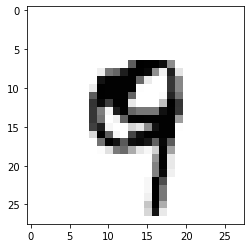

In [42]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())